In [1]:
from brainsmash.mapgen.base import Base
from brainsmash.mapgen.eval import base_fit
from brainsmash.mapgen.stats import pearsonr, pairwise_r, nonparp
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

atlasname="schaefer400x7_aal"

In [2]:
def brainSMASH(distMat,map1,map2,labels,atlasname,nh=25,pv=25):
    gen = Base(map2,distMat,resample=True,nh=nh,pv=pv)
    surrogate_maps = gen(n=1000)
    
    #generate all surrogate correlations
    surrogate_brainmap_corrs = pearsonr(map1, surrogate_maps).flatten()
    surrogate_pairwise_corrs = pairwise_r(surrogate_maps, flatten=True)
    np.savetxt("brainsmash_corrs/surrogate_brainmap_corrs_%s_%s_map.txt"%(atlasname,labels[1]),X=surrogate_brainmap_corrs,delimiter=",",header=labels[1])
    
    
    naive_surrogates = np.array([np.random.permutation(map1) for _ in range(5000)])
    naive_brainmap_corrs = pearsonr(map2, naive_surrogates).flatten()
    naive_pairwise_corrs = pairwise_r(naive_surrogates, flatten=True)
    np.savetxt("brainsmash_corrs/surrogate_naive_corrs_%s_%s_map.txt"%(atlasname,labels[1]),X=naive_brainmap_corrs,delimiter=",",header=labels[1])
    
    # The observed correlation
    test_stat = stats.pearsonr(map1, map2)[0]
    
    #Plotting
    sac = '#377eb8'  # autocorr-preserving color
    rc = '#e41a1c'  # randomly shuffled color
    bins = np.linspace(-1, 1, 51)  # correlation b

    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_axes([0.2, 0.25, 0.6, 0.6])  # autocorr preserving
    ax2 = ax.twinx()  # randomly shuffled

    # plot the data
    ax.axvline(test_stat, 0, 0.8, color='k', linestyle='dashed', lw=1)
    ax.hist(surrogate_brainmap_corrs, bins=bins, color=sac, alpha=1,
        density=True, clip_on=False, zorder=1)
    ax2.hist(naive_brainmap_corrs, bins=bins, color=rc, alpha=0.7,
        density=True, clip_on=False, zorder=2)

    # make the plot nice...
    ax.set_xticks(np.arange(-1, 1.1, 0.5))
    ax.spines['left'].set_color(sac)
    ax.tick_params(axis='y', colors=sac)
    ax2.spines['right'].set_color(rc)
    ax2.tick_params(axis='y', colors=rc)
    ax.set_ylim(0, 2)
    ax2.set_ylim(0, 6)
    ax.set_xlim(-1, 1)
    [s.set_visible(False) for s in [
        ax.spines['top'], ax.spines['right'], ax2.spines['top'], ax2.spines['left']]]
    ax.text(0.97, .96, 'Permutation', ha='right',va='bottom',
        color=rc, transform=ax.transAxes)
    ax.text(0.97, .9, 'brainSMASH', ha='right', va='bottom',
        color=sac, transform=ax.transAxes)
    ax.text(test_stat, 1.65, "%s\nmap"%labels[0], ha='center', va='bottom')
    ax.text(0.5, -0.2, "Pearson correlation\nwith %s map"%labels[1],
        ha='center', va='top', transform=ax.transAxes)
    ax.text(-0.3, 0.5, "Density", rotation=90, ha='left', va='center', transform=ax.transAxes)
    plt.title(labels[2])
    plt.show()
    
    

    print("r = ", test_stat)
    print("Spatially naive p-value = ", nonparp(test_stat, naive_brainmap_corrs))
    print("SA-corrected p-value = ", nonparp(test_stat, surrogate_brainmap_corrs))
    print("Critical surrogate brain map corr value = ", np.quantile(surrogate_brainmap_corrs,.95))

In [3]:
# Load Data
distMat = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_distMat.csv"%atlasname,delimiter=",")
svm_weights = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_SVM_weights.csv"%atlasname,delimiter=",")

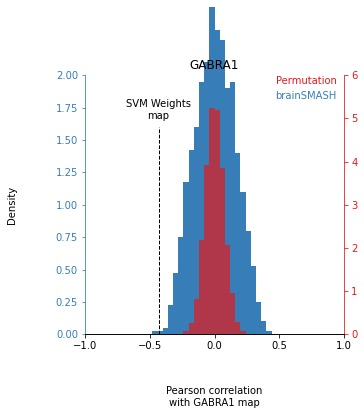

r =  -0.4318982380457264
Spatially naive p-value =  0.0
SA-corrected p-value =  0.001
Critical surrogate brain map corr value =  0.26442141482069814


In [4]:
GABRA1 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA1.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA1,atlasname=atlasname,labels=["SVM Weights","GABRA1","GABRA1"])

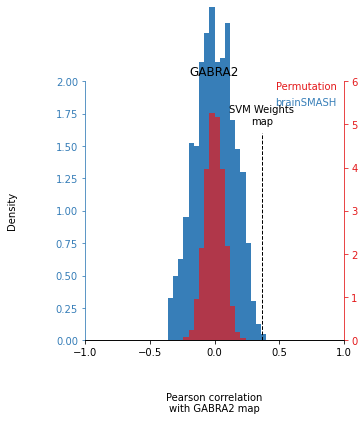

r =  0.3657844747627369
Spatially naive p-value =  0.0
SA-corrected p-value =  0.002
Critical surrogate brain map corr value =  0.23371870958442933


In [5]:
GABRA2 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA2.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,atlasname=atlasname,map2=GABRA2,labels=["SVM Weights","GABRA2","GABRA2"])

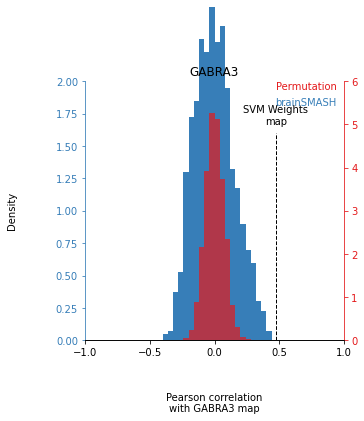

r =  0.4736905394908364
Spatially naive p-value =  0.0
SA-corrected p-value =  0.0
Critical surrogate brain map corr value =  0.2782099145582847


In [6]:
GABRA3 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA3.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA3,atlasname=atlasname,labels=["SVM Weights","GABRA3","GABRA3"])

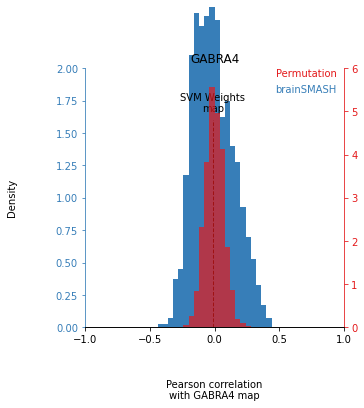

r =  -0.013258179537166865
Spatially naive p-value =  0.856
SA-corrected p-value =  0.927
Critical surrogate brain map corr value =  0.2703501547052542


In [7]:
GABRA4 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA4.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA4,atlasname=atlasname,labels=["SVM Weights","GABRA4","GABRA4"])

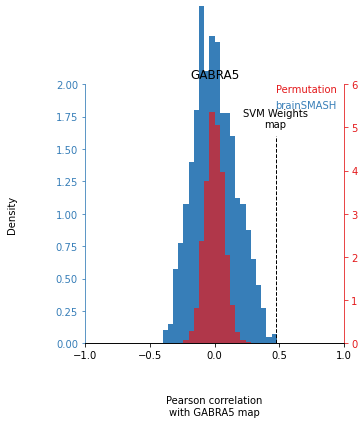

r =  0.47077171767660314
Spatially naive p-value =  0.0
SA-corrected p-value =  0.001
Critical surrogate brain map corr value =  0.2950012244965873


In [8]:
GABRA5 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA5.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA5,atlasname=atlasname,labels=["SVM Weights","GABRA5","GABRA5"])

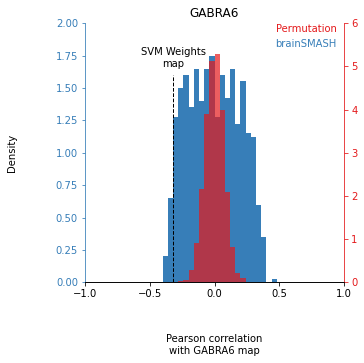

r =  -0.32038492084812215
Spatially naive p-value =  0.0
SA-corrected p-value =  0.071
Critical surrogate brain map corr value =  0.30905811380785697


In [9]:
GABRA6 = np.loadtxt("output/brainsmash/input_files/%s_threshold_0.95_cortex_GABRA6.csv"%atlasname)
brainSMASH(distMat=distMat,map1=svm_weights,map2=GABRA6,atlasname=atlasname,labels=["SVM Weights","GABRA6","GABRA6"])

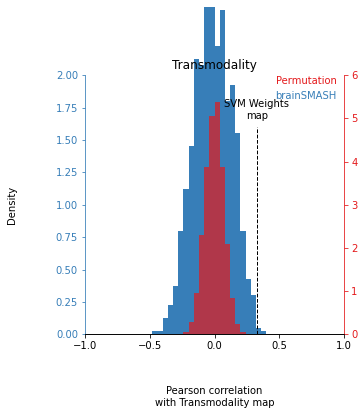

r =  0.3269288223672463
Spatially naive p-value =  0.0
SA-corrected p-value =  0.016
Critical surrogate brain map corr value =  0.21356794190005382


In [10]:
transmodality = np.loadtxt("output/brainsmash/input_files/schaefer400x7_aal_threshold_0.95_cortex_transmodality.csv")
brainSMASH(distMat=distMat,map1=svm_weights,map2=transmodality,atlasname=atlasname,labels=["SVM Weights","Transmodality","Transmodality"])